In [2]:
from random import seed
from random import randint
from random import uniform
from random import sample
import math
import random
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from scipy.io import arff
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, auc, recall_score, precision_score, roc_curve
from scipy import stats

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = arff.loadarff('5year.arff')
df = pd.DataFrame(data[0])

df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,0.109490,0.197600,0.096885,0.109490,1475.20,0.247420,1.8027,0.109490,0.077287,50.199,1.15740,0.135230,0.062287,0.41949,0.320360,0.209120,1.03870,0.026093,6.1267,0.377880,0.077287,155.330,2.3498,0.24377,0.135230,1.4493,571.3700,0.32101,0.095457,0.128790,0.111890,0.095457,127.30,77.096,0.452890,0.66883,54.621,0.107460,0.075859,1.01930,0.55407,0.42557,0.73717,0.73866,15182.0000,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,0.001329,-0.015967,0.037544,-0.006202,3693.40,0.098825,2.0634,-0.006202,-0.004862,59.923,1.01580,0.001289,-0.004862,NaN,0.080285,0.098825,0.17118,0.615450,4.0022,0.363810,0.000778,108.050,3.3779,2.70750,-0.036475,1.2757,5.2519,0.59380,-0.028591,0.057810,0.291670,0.001011,171.38,111.450,-0.029614,1.06060,58.258,-0.052809,-0.041395,1.28230,0.38846,0.29604,1.36140,1.56860,2341.8000,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,0.162120,0.732180,0.165680,0.162120,431.75,0.845390,4.5164,0.162120,0.143490,41.508,1.23620,0.145860,0.115280,0.23566,0.677310,0.701430,1.47370,2.872100,4.7622,0.050069,0.143490,81.653,4.4701,0.65878,0.145860,1.1698,NaN,0.67731,0.129100,1.319600,0.042587,0.129100,163.71,122.200,1.013700,3.02800,47.382,0.120800,0.106920,3.60820,0.22142,0.22371,3.36840,3.36840,33401.0000,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,-0.080792,-0.174450,0.084038,-0.089951,3020.50,0.120840,1.1274,-0.089951,-0.070525,47.698,1.09420,0.000000,-0.070525,NaN,0.064737,0.120840,0.00000,1.251900,4.0153,0.657790,-0.138650,253.910,1.4375,0.83567,0.014027,1.2754,1.9005,0.43830,0.010998,0.456220,0.149980,0.000000,157.30,109.600,-0.539690,1.19900,82.073,-0.197140,-0.154560,0.88491,0.51564,0.69565,0.52538,2.03780,2789.6000,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,0.091990,0.134190,0.055575,0.059280,2386.10,0.152970,1.8168,0.059280,0.039129,36.074,0.99455,0.067616,0.031802,0.00000,0.429200,0.132800,2.06710,0.238910,5.8823,0.363310,0.039129,140.120,2.6583,2.13360,0.364200,1.5150,6.3783,0.51225,0.240400,0.067283,0.198280,0.044632,125.21,89.134,0.321770,0.90475,46.538,0.042701,0.028186,0.99819,0.44176,0.37618,0.99779,1.13690,1.2437,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


In [4]:
# Decode class variable and make it an integer
df['class'] = df['class'].apply(lambda x: x.decode("utf-8")).astype(str).astype(int)

In [5]:
df.to_csv('5year.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
Attr1     5907 non-null float64
Attr2     5907 non-null float64
Attr3     5907 non-null float64
Attr4     5889 non-null float64
Attr5     5899 non-null float64
Attr6     5907 non-null float64
Attr7     5907 non-null float64
Attr8     5892 non-null float64
Attr9     5909 non-null float64
Attr10    5907 non-null float64
Attr11    5907 non-null float64
Attr12    5889 non-null float64
Attr13    5910 non-null float64
Attr14    5907 non-null float64
Attr15    5904 non-null float64
Attr16    5892 non-null float64
Attr17    5892 non-null float64
Attr18    5907 non-null float64
Attr19    5910 non-null float64
Attr20    5910 non-null float64
Attr21    5807 non-null float64
Attr22    5907 non-null float64
Attr23    5910 non-null float64
Attr24    5775 non-null float64
Attr25    5907 non-null float64
Attr26    5892 non-null float64
Attr27    5519 non-null float64
Attr28    5803 non-null float

In [7]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,Attr11,Attr12,Attr13,Attr14,Attr15,Attr16,Attr17,Attr18,Attr19,Attr20,Attr21,Attr22,Attr23,Attr24,Attr25,Attr26,Attr27,Attr28,Attr29,Attr30,Attr31,Attr32,Attr33,Attr34,Attr35,Attr36,Attr37,Attr38,Attr39,Attr40,Attr41,Attr42,Attr43,Attr44,Attr45,Attr46,Attr47,Attr48,Attr49,Attr50,Attr51,Attr52,Attr53,Attr54,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,5907.000000,5907.000000,5907.000000,5889.000000,5.899000e+03,5907.000000,5907.000000,5892.000000,5909.000000,5907.000000,5907.000000,5889.000000,5910.000000,5907.000000,5.904000e+03,5892.000000,5892.000000,5907.000000,5910.000000,5910.000000,5807.000000,5907.000000,5910.000000,5775.000000,5907.000000,5892.000000,5519.000000,5803.000000,5907.000000,5910.000000,5910.000000,5.864000e+03,5889.000000,5892.000000,5907.000000,5907.000000,3362.000000,5907.000000,5910.000000,5889.000000,5826.000000,5910.000000,5910.000000,5910.000000,5642.000000,5889.000000,5875.000000,5907.000000,5910.000000,5892.000000,5907.000000,5874.000000,5803.000000,5803.000000,5.910000e+03,5910.000000,5907.000000,5910.000000,5907.000000,5.642000e+03,5895.000000,5910.000000,5889.000000,5803.000000,5910.000000
mean,-0.022347,0.465086,0.189155,4.892476,1.940676e+01,0.022584,-0.111951,5.737741,1.588322,0.545580,-0.010092,1.065218,0.354420,-0.111926,1.033617e+03,1.186271,6.834590,-0.102620,-0.090248,56.671984,2.459377,-0.004537,-0.096856,0.138872,0.375084,1.091288,463.636810,10.234075,4.153190,0.847846,-0.065775,2.111590e+03,8.337360,5.007268,-0.007458,2.046381,114.025985,0.652972,0.017169,2.207769,2.190733,-0.015133,155.555922,98.884058,66.633356,4.007755,137.422975,-0.089811,-0.071043,4.167662,0.425672,0.730901,11.196760,12.110189,1.081731e+04,0.057222,-0.263837,0.956504,0.279319,9.110338e+02,10.941497,241.978184,9.127741,65.276716,0.069374
std,6.163655,5.751283,1.177729,91.434574,2.152932e+04,9.992080,9.057135,102.355101,1.548390,5.763742,6.063065,35.275574,30.918776,9.057136,1.301280e+05,37.321108,102.360970,9.085605,5.444892,168.125493,100.552690,5.632599,5.418386,7.364214,4.135367,35.395704,10220.644305,302.282846,0.835222,19.077521,5.258337,8.480798e+04,102.380284,100.233819,5.628593,12.775762,1597.055061,7.115032,0.709789,57.716329,83.087033,2.437361,782.620733,719.836958,4873.399821,91.279901,3277.167587,7.078694,2.456258,90.946395,1.091838,12.857768,314.403983,320.591897,7.956401e+04,0.698096,18.425091,0.857326,5.840554,6.415469e+04,41.166591,6221.135690,103.074304,2150.645860,0.254110
min,-463.890000,-430.870000,-72.067000,-0.403110,-1.076400e+06,-463.890000,-517.480000,-3.735100,-3.496000,-71.444000,-463.890000,-231.850000,-310.340000,-517.480000,-9.632400e+06,-221.330000,-0.002321,-517.480000,-310.800000,-29.340000,-135.150000,-431.590000,-310.890000,-463.890000,-71.444000,-221.330000,-158130.000000,-1089.700000,0.006359,-23.060000,-310.800000,-2.551000e+02,-1.433400,-16.015000,-431.590000,0.000191,-4.325800,-71.444000,-47.047000,-9.068600,-269.990000,-143.520000,-3975.600000,-3946.200000,-3037.300000,-9.049000,-18.658000,-542.560000,-144.800000,-0.012175,-0.186610,-0.697640,-1088.700000,-1088.700000,-1.118500e+06,-46.788000,-1236.300000,-0.164390,-184.980000,-1.244000e+01,-0.092493,-236.530000,-1.543200,-3.726500,0.000000
25%,0.003965,0.255355,0.043953,1.093700,-4.383650e+01,0.000000,0.005889,0.481865,1.014800,0.318940,0.015207,0.015605,0.024002,0.005889,2.338125e+02,0.074189,1.510150,0.005889,0.004098,18.280250,0.989250,0.000000,0.002571,0.020797,0.178030,0.068926,0.075715,0.081587,3.648750,0.085630,0.006764,4.958225e+01,2.758600,0.249343,0.007616,1.071400,1.294925,0.434150,0.004999,0.051078,0.030253,0.000000,75.524750,38.891750,0.017927,0.640130,19.627000,-0.031709,-0.023905,0.830045,0.185465,0.135640,0.750255,0.991785,8.791225e+01,0.010996,0.015655,0.876553,0.000000,5.248500e+00,4.278650,44.646750,3.066900,2.147500,0.000000
50%,0.046670,0.451750,0.219440,1.651700,4.914900e-01,0.000000,0.056500,1.149300,1.1

In [8]:
df.isna().sum()

Attr1        3
Attr2        3
Attr3        3
Attr4       21
Attr5       11
Attr6        3
Attr7        3
Attr8       18
Attr9        1
Attr10       3
Attr11       3
Attr12      21
Attr13       0
Attr14       3
Attr15       6
Attr16      18
Attr17      18
Attr18       3
Attr19       0
Attr20       0
Attr21     103
Attr22       3
Attr23       0
Attr24     135
Attr25       3
Attr26      18
Attr27     391
Attr28     107
Attr29       3
Attr30       0
Attr31       0
Attr32      46
Attr33      21
Attr34      18
Attr35       3
Attr36       3
Attr37    2548
Attr38       3
Attr39       0
Attr40      21
Attr41      84
Attr42       0
Attr43       0
Attr44       0
Attr45     268
Attr46      21
Attr47      35
Attr48       3
Attr49       0
Attr50      18
Attr51       3
Attr52      36
Attr53     107
Attr54     107
Attr55       0
Attr56       0
Attr57       3
Attr58       0
Attr59       3
Attr60     268
Attr61      15
Attr62       0
Attr63      21
Attr64     107
class        0
dtype: int64

In [9]:
# replace missing values with mean
df = df.fillna(df.mean())
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
Attr6     0
Attr7     0
Attr8     0
Attr9     0
Attr10    0
Attr11    0
Attr12    0
Attr13    0
Attr14    0
Attr15    0
Attr16    0
Attr17    0
Attr18    0
Attr19    0
Attr20    0
Attr21    0
Attr22    0
Attr23    0
Attr24    0
Attr25    0
Attr26    0
Attr27    0
Attr28    0
Attr29    0
Attr30    0
Attr31    0
Attr32    0
Attr33    0
Attr34    0
Attr35    0
Attr36    0
Attr37    0
Attr38    0
Attr39    0
Attr40    0
Attr41    0
Attr42    0
Attr43    0
Attr44    0
Attr45    0
Attr46    0
Attr47    0
Attr48    0
Attr49    0
Attr50    0
Attr51    0
Attr52    0
Attr53    0
Attr54    0
Attr55    0
Attr56    0
Attr57    0
Attr58    0
Attr59    0
Attr60    0
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
dtype: int64

In [10]:
print(df['class'].value_counts())
print('Proportion of bankrupt companies:', round(410/(5500+410), 2))

0    5500
1     410
Name: class, dtype: int64
Proportion of bankrupt companies: 0.07


In [11]:
# Visualizing Features
data_num = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
data_num = data_num.drop('class', axis=1)

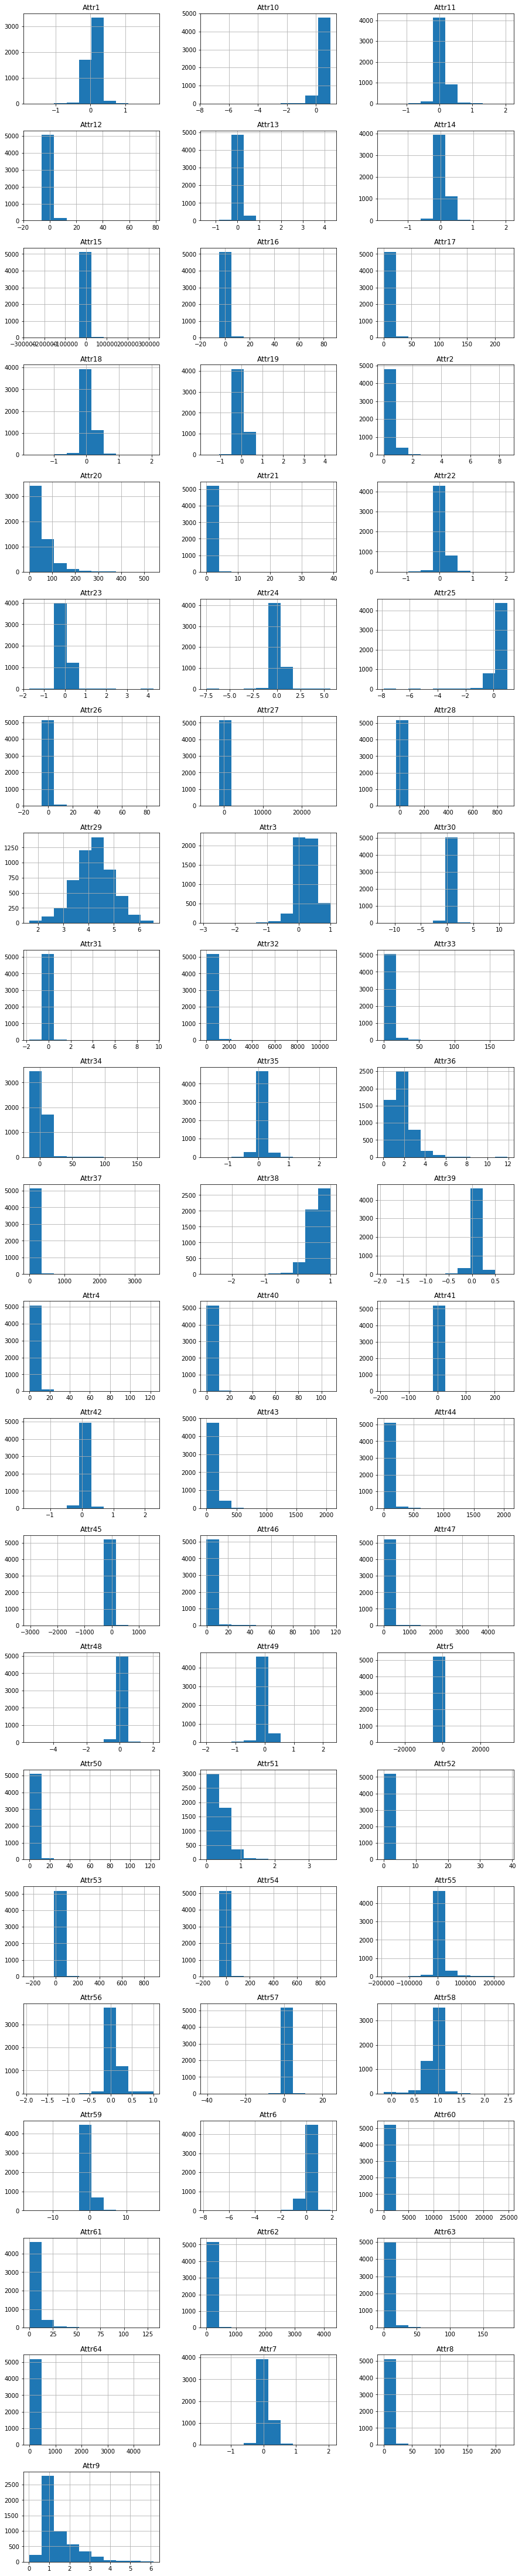

In [12]:
data_num.hist(bins=10, figsize=(15,80), layout=(22, 3));

In [10]:
# Train and test sets
X = df.drop('class', axis=1)
y = df['class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 0)

In [11]:
# Normalize dataset 
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler().fit(X_train) # (value - min)/ max-min
X_train_scaled = pd.DataFrame(scaler.transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))

# Re-assign indexes and columns to scaled data
X_train_scaled.index = X_train.index
X_train_scaled.columns = X_train.columns
X_test_scaled.index = X_test.index
X_test_scaled.columns = X_test.columns
X_test = X_test_scaled

In [12]:
# balancing dataset
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)

X_resample, y_resample = smt.fit_sample(X_train_scaled, y_train)

print(X_train.shape)
print("y before SMOTE", np.bincount(y_train))
print("y after SMOTE", np.bincount(y_resample))

# Re-assign columns to scaled data
X_train = pd.DataFrame(X_resample)
y_train = pd.DataFrame(y_resample)

(4728, 64)
y before SMOTE [4399  329]
y after SMOTE [4399 4399]


### Logistic Regression

In [13]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

In [14]:
def move(current_solution, feature_size): # create a function that makes one 1 =0 and one 0=1
    next_solution = current_solution.copy()
    
    index_1 = np.random.randint(0, feature_size)
    index_2 = np.random.randint(0, (len(current_solution) - feature_size))
    
    one = np.where(next_solution == 1.)[0][index_1]
    zero = np.where(next_solution == 0.)[0][index_2]
    
    next_solution[one] = 0 # 1 becomes 0
    next_solution[zero] = 1 # 0 becomes 1
    
    return next_solution # get the next_solution

In [15]:
def get_accuracy(X_train, y_train, X_test, y_test, current_solution):
    
    train = X_train.loc[:, current_solution.astype(bool)] # I subset whetevr my current solution tells me to subset
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(train, y_train.values.ravel())
    
    test = X_test.loc[:, current_solution.astype(bool)]
    return lr.score(test, y_test)

In [21]:
cooling_rates = np.array([0.05, 0.1, 0.5])
current_temps = np.array([1000, 500])

In [22]:
## Create df to store results
sol_pd = pd.DataFrame(columns = ['cooling_rate', 'current_temp','Features_Selected','Accuracy'])
sol_pd['cooling_rate'] = [0.05, 0.1, 0.5]*2
temps = ([1000, 500])*3
temps.sort(reverse = True)
sol_pd['current_temp'] = temps


In [23]:
def features(row):
    return current_solution.argsort()[-5:]

In [24]:
feature_size = 5 # number of feature to start with (I'll have 5 features selected). This is the upper limit
current_solution = np.zeros(X_train.shape[1])
current_solution[sample(range(0, X_train.shape[1]), feature_size)] = 1

import time
start = time.time()

for rate in cooling_rates:
    
    for temp in current_temps:
        current_temp = temp
        cc_temp = current_temp.copy() # values to add to df
        cc_rate = rate.copy() # values to add to df
        final_temp = 1
        iteration_count = 100 # repeat algorithm 1000 times for each temperature
        cooling_rate = rate 
        
        solutions = []
        temp = []

        while final_temp < current_temp: # while final temp is 1 is smaller than current temp is 10000

            for i in range(iteration_count): # for 100 times

                solution = []

                accuracy = get_accuracy(X_train, y_train, X_test, y_test, current_solution)
                next_solution = move(current_solution, feature_size) # move func is going to make one 0 =1 and one 1=0
                accuracy_next = get_accuracy(X_train, y_train, X_test, y_test, next_solution)

                if  accuracy < accuracy_next:
                    current_solution = next_solution
            
                else:
            
                    delta = accuracy - accuracy_next
                    prob_accept = math.exp(-delta/current_temp)
            
                    if prob_accept>random.random():
                        current_solution = next_solution
        
                solution.append(get_accuracy(X_train, y_train, X_test, y_test, current_solution))
        
                
        
            solutions.append(sum(solution)/len(solution))
            temp.append(current_temp)

            
            current_temp = current_temp*cooling_rate
            sol_pd.loc[((sol_pd['cooling_rate'] == cc_rate) & (sol_pd['current_temp'] == cc_temp)), 'Accuracy'] = accuracy
            sol_pd.loc[((sol_pd['cooling_rate'] == cc_rate) & (sol_pd['current_temp'] == cc_temp)), 'Features_Selected'] = sol_pd.apply(features, axis=1)


end = time.time()
total_time = (end - start)
print(total_time)

152.63683795928955


In [25]:
sol_pd.sort_values('Accuracy')

,cooling_rate,current_temp,Features_Selected,Accuracy
1,0.10,1000,"[52, 12, 4, 30, 28]",0.617597
3,0.05,500,"[15, 57, 32, 39, 31]",0.621827
5,0.50,500,"[8, 5, 26, 49, 29]",0.777496
4,0.10,500,"[37, 49, 2, 38, 8]",0.823181
0,0.05,1000,"[22, 52, 41, 43, 16]",0.86802
2,0.50,1000,"[46, 24, 34, 49, 31]",0.912014


In [13]:
# Remove outliers for plotting the 5 top features
q = df['Attr47'].quantile(0.99)
p = df['Attr47'].quantile(0.01)

# Filter out outliers
df = df[df["Attr47"] < q]
df = df[df["Attr47"] > p]

# Remove outliers for plotting
q = df['Attr25'].quantile(0.99)
p = df['Attr25'].quantile(0.01)

# Filter out outliers
df = df[df["Attr25"] < q]
df = df[df["Attr25"] > p]

# Remove outliers for plotting
q = df['Attr35'].quantile(0.99)
p = df['Attr35'].quantile(0.01)

# Filter out outliers
df = df[df["Attr35"] < q]
df = df[df["Attr35"] > p]

# Remove outliers for plotting
q = df['Attr50'].quantile(0.99)
p = df['Attr50'].quantile(0.01)

# Filter out outliers
df = df[df["Attr50"] < q]
df = df[df["Attr50"] > p]

# Remove outliers for plotting
q = df['Attr32'].quantile(0.99)
p = df['Attr32'].quantile(0.01)

# Filter out outliers
df = df[df["Attr32"] < q]
df = df[df["Attr32"] > p]

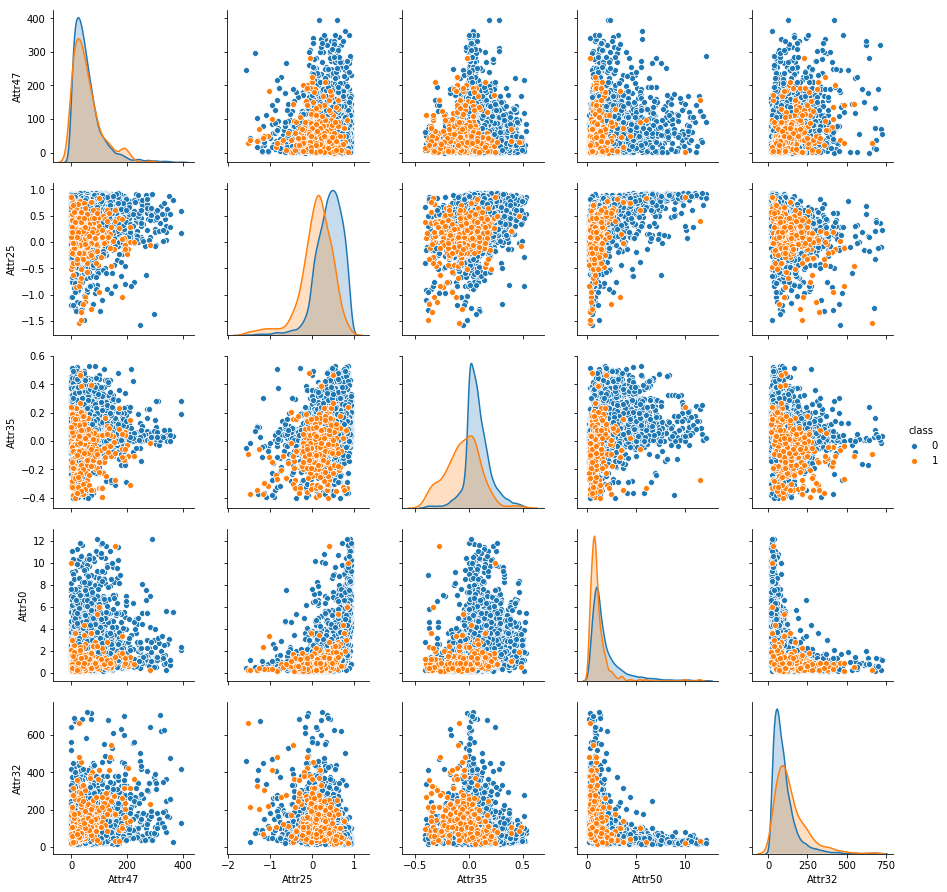

In [14]:
sns.pairplot(df, hue = 'class', 
             vars = ['Attr47', 'Attr25', 'Attr35', 'Attr50', 'Attr32'])